In [8]:
import nsfg
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def CohenEffectSize(group1, group2):
    """calculates Cohen's d given any 2 groups"""
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [5]:
def compare_weight(live, first, others):
    """compares weight between all live births, first births, and all births other than first
       using histograms, mean, variance, difference in mean, and cohen's d"""
    # plots histogram of first births weight vs other births weight
    first_hist = plt.hist([first.totalwgt_lb, others.totalwgt_lb], label=["First Baby Wgt", "Other Babies Wgt"])
    plt.legend(loc="upper right")
    plt.show()
    # calculates mean of live, first, and others
    mean_live = live.totalwgt_lb.mean()
    mean_first = first.totalwgt_lb.mean()
    mean_others = others.totalwgt_lb.mean()
    print(f"First Births Mean weight: {mean_first}\n"
          f"Other Births Mean Weight: {mean_others}")
    # calculates variance of first and others
    var_first = first.totalwgt_lb.var()
    var_others = others.totalwgt_lb.var()
    print(f"First Births Variance: {var_first}\n"
          f"Other Births Variance: {var_others}")
    # calculates difference in lbs between first and others
    print("Difference in lbs", mean_first - mean_others)
    # calculates difference relative to the mean as a percentage
    print("Difference relative to mean: ", (mean_first - mean_others) / mean_live * 100, "%")
    # calculates Cohen's d
    d = CohenEffectSize(first.totalwgt_lb, others.totalwgt_lb)
    print(f"Cohen's d: {d}")

In [6]:
def main():
    # creates data frame of all pregnancies
    preg = nsfg.ReadFemPreg()
    # creates data frame of all pregnancies resulting in live birth
    live = preg[preg.outcome == 1]
    # creates data frame of all first baby pregnancies
    first = live[live.birthord == 1]
    # creates data frame of all pregnancies other than first
    others = live[live.birthord != 1]
    # compares weight difference between first babies and others
    compare_weight(live, first, others)

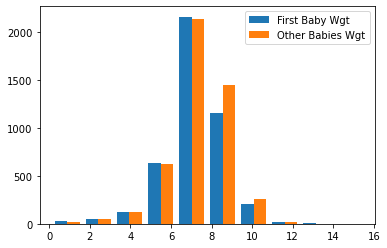

First Births Mean weight: 7.201094430437772
Other Births Mean Weight: 7.325855614973262
First Births Variance: 2.0180273009157768
Other Births Variance: 1.9437810258964572
Difference in lbs -0.12476118453549034
Difference relative to mean:  -1.7171423678372415 %
Cohen's d: -0.088672927072602


In [9]:
if __name__ == "__main__":
    main()

# Conclusion
Most of the summary statistics point to other babies being heavier compared to first babies. However, there is still not a very large difference between the two (2oz difference in mean)